In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from itertools import combinations

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [3]:
df = pd.read_csv("car_data.csv")
df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


#### Tasks, Part 1.1

In [5]:
regr_mp = linear_model.LinearRegression()
mileage = df[['Mileage']]
price = df['Price']
regr_mp.fit(mileage, price)
print('{} * Price + {:.2f}'.format(regr_mp.coef_[0], regr_mp.intercept_))

-0.17252050279124917 * Price + 24764.56


#### Tasks, Part 1.2

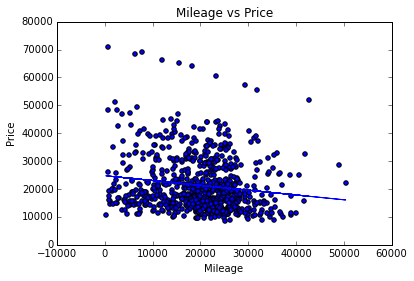

In [14]:
plt.scatter(x=mileage, y=price)
plt.plot(mileage, regr_mp.predict(mileage))
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### Tasks, Part 1.3

In [16]:
print('Score of linear regression: {:.5f}'
      .format(regr_mp.score(mileage, price)))

Score of linear regression: 0.02046


The score is nowhere near 0.8; this is not a good fit for our data.

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [18]:
df.head(1)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [40]:
car_features = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']


In [77]:
def lin_reg_eq(cols, df, focus='Price', print_this=False):
    input_cols = df[cols]
    focus_output = df[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    if print_this:
        print('The equation for columns {} w.r.t. {}:\n'.format(cols, focus))
        for n, x in enumerate(cols):
            print('({} * {}) + '.format(regr.coef_[n], x), end='')
        print('{}'.format(regr.intercept_))
    return regr

#### Tasks, Part 2.1

In [79]:
regr_features = lin_reg_eq(car_features, df, print_this=True)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] w.r.t. Price:

(-0.16974783233303678 * Mileage) + (3792.3789307825145 * Cylinder) + (-787.2207316338258 * Liter) + (-1542.7458463820647 * Doors) + (6288.997149849924 * Cruise) + (-1993.7952756984287 * Sound) + (3349.3616196135545 * Leather) + 6758.755143598082


#### Tasks, Part 2.2

In [82]:
print('Score of the above linear regression: {}'
      .format(regr_features.score(df[car_features], df['Price'])))

Score of the above linear regression: 0.4462643536728379


In [28]:
def lin_reg_wrt_focus(cols, df, focus='Price'):
    input_cols = df[cols]
    focus_output = df[focus]
    regr = linear_model.LinearRegression()
    regr.fit(input_cols, focus_output)
    return regr.score(input_cols, focus_output)

def get_combos(cols):
    return [combinations(cols, n + 1) for n in range(len(cols))]

def all_combo_scores(combos, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

#### Tasks, Part 2.3

In [29]:
combos = get_combos(car_features)
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.4462643536728379,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.43780574153663798,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237245, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475605,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252673, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809262,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42576813279744208, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267845,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42441824017998753,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510394, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398466, ('Mileage', 'Cylinder', 'Liter', 'Cru

#### Tasks, Part 2.3 Conclusion

There is no combination that produces a strong correlation. However, the **`Cylinder`** field has a high score on its own: 0.32385903759512258.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.